In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

/mnt/xfs/home/bencw/workspace/pretraining-distribution-shift-robustness


In [2]:
import matplotlib.pyplot as plt
import src.plotting_utils as plotting_utils
from src.experiments.imagenet_synthetic_shift import managers

## Plot accuracy on the line and compute effective robustness

In [3]:
def plot_with_effective_robustness(manager, target_split="target_val", ax=None):
    ax = ax or plt.gca()
    baseline_model_names = manager.model_names[36: 36 + 35]
    pretrained_model_names = manager.model_names[30: 35]
    custom_styles = {
        "CLIP (FT)": {"marker": "s"},
        "CLIP (LP-FT)": {"marker": "s"},
        "CLIP (ZS-FT)": {"marker": "s"},
        "AugReg (FT)": {"marker": "s"},
        "AugReg (LP-FT)": {"marker": "s"},
    }
    plotting_utils.plot_on_the_line(
        manager,
        target_split=target_split,
        model_names=baseline_model_names + pretrained_model_names,
        scatter_alpha=0.5,
        ax=ax,
        include_legend=False,
        custom_styles=custom_styles,
    )
    ers = manager.get_effective_robustness(
        "source_val",
        target_split,
        "Baseline",
        with_confidence_interval=True,
        model_names=pretrained_model_names,
    )
    lower, mean_er, upper = sum(ers.values()) / len(ers)
    error = max(mean_er - lower, upper - mean_er)
    text_info = rf"ER = ${mean_er * 100:.2f}\pm{error * 100:.2f}\%$"
    ax.text(
        0.05,
        0.95,
        text_info,
        transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(facecolor="white", alpha=0.25),
    )

/mnt/xfs/home/bencw/workspace/pretraining-distribution-shift-robustness/src/plotting_utils.py:107: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  p = ax.errorbar(x, y, xerr=x_errors, yerr=y_errors, alpha=scatter_alpha, markersize=s/4, label=label, marker=marker, fmt='o', capsize=2, c=c)


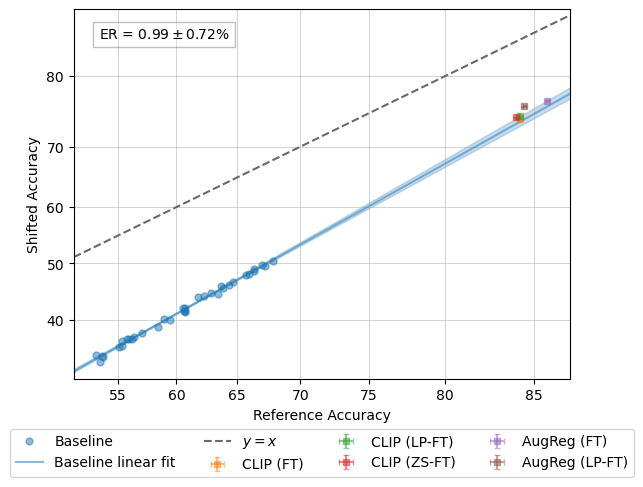

In [4]:
ax = plt.gca()
plot_with_effective_robustness(managers["tint_p=0.5"], ax=ax)
plt.legend(handles=ax.get_legend_handles_labels()[0], bbox_to_anchor=(0.5, -0.2), loc='center', ncol=4)
plt.show()